CSCI - 4146 - The Process of Data Science - Summer 2021
Assignment 2
Mayuri Chilekar
B00925385

Deepak Hariharan
B00928025







In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [39]:
import pandas as pd
import sklearn
#from scikit-learn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import utils

In [71]:
data_set = pd.read_csv("/content/drive/MyDrive/tripadvisor_european_restaurants.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [41]:
data_set.head()

,restaurant_link,restaurant_name,original_location,country,region,province,city,address,latitude,longitude,...,excellent,very_good,average,poor,terrible,food,service,value,atmosphere,keywords
0,g10001637-d10002227,Le 147,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Ha...",France,Nouvelle-Aquitaine,Haute-Vienne,Saint-Jouvent,"10 Maison Neuve, 87510 Saint-Jouvent France",45.961674,1.169131,...,2.0,0.0,0.0,0.0,0.0,4.0,4.5,4.0,NaN,NaN
1,g10001637-d14975787,Le Saint Jouvent,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Ha...",France,Nouvelle-Aquitaine,Haute-Vienne,Saint-Jouvent,"16 Place de l Eglise, 87510 Saint-Jouvent France",45.957040,1.205480,...,2.0,2.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,g10002858-d4586832,Au Bout du Pont,"[""Europe"", ""France"", ""Centre-Val de Loire"", ""B...",France,Centre-Val de Loire,Berry,Rivarennes,"2 rue des Dames, 36800 Rivarennes France",46.635895,1.386133,...,3.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,g10002986-d3510044,Le Relais de Naiade,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Co...",France,Nouvelle-Aquitaine,Correze,Lacelle,"9 avenue Porte de la Correze 19170, 19170 Lace...",45.642610,1.824460,...,1.0,0.0,0.0,0.0,0.0,4.5,4.5,4.5,NaN,NaN
4,g10022428-d9767191,Relais Du MontSeigne,"[""Europe"", ""France"", ""Occitanie"", ""Aveyron"", ""...",France,Occitanie,Aveyron,Saint-Laurent-de-Levezou,"route du Montseigne, 12620 Saint-Laurent-de-Le...",44.208860,2.960470,...,4.0,7.0,0.0,0.0,0.0,4.5,4.5,4.5,NaN,NaN


Encoding of Categorical Feature


In [42]:
#encoding of categorical feature
data_set['price_level'] = data_set['price_level'].map({'€€-€€€':1, '€':0, '€€€€':2})
#data_set['claimed'] = data_set['claimed'].map({'claimed':1, 'unclaimed':0})
data_set['vegetarian_friendly'] = data_set['vegetarian_friendly'].map({'Y':1, 'N':0})
data_set['vegan_options'] = data_set['vegan_options'].map({'Y':1, 'N':0})
data_set['gluten_free'] = data_set['gluten_free'].map({'Y':1, 'N':0})
data_set['default_language'] = data_set['default_language'].map({'All languages':1, 'English':0})

#Label and One hot encoding
le = LabelEncoder()
# data_set['price_level'] = le.fit_transform(data_set['price_level'])
# data_set['vegetarian_friendly'] = le.fit_transform(data_set['vegetarian_friendly'])
# data_set['vegan_options'] = le.fit_transform(data_set['vegan_options'])
# data_set['gluten_free'] = le.fit_transform(data_set['gluten_free'])
# data_set['default_language'] = le.fit_transform(data_set['default_language'])
data_set['claimed'] = le.fit_transform(data_set['claimed'])
data_set['food'] = le.fit_transform(data_set['food'])
data_set['service'] = le.fit_transform(data_set['service'])
data_set['excellent'] = le.fit_transform(data_set['excellent'])
data_set['atmosphere'] = le.fit_transform(data_set['atmosphere'])
data_set['value'] = le.fit_transform(data_set['value'])
#data_set['claimed'] = le.fit_transform(data_set['claimed'])

Removing unwanted columns from the dataset, which will not be requiring for predicting the average rating

In [72]:
data_set.drop(['restaurant_name','country','address','awards','popularity_detailed','cuisines','features','original_location','region','province','city','restaurant_link','latitude','longitude','top_tags','popularity_generic','price_range','special_diets','meals','original_open_hours','working_shifts_per_week','reviews_count_in_default_language','keywords'],axis=1,inplace=True)


###1. Expalining the Task

In our scenario, as we have a target feature and a set of features to predict the target feature, hence our task fits into supervised learning. As the target variable is avg_rating which is continuous, but the target feature lies between a specified set of data, rating ranged from [1-5] we are perfoming classification for building the model.

In our scenario, as we have a target feature and a set of features to predict the target feature, hence our task fits into supervised learning. As the target variable is avg_rating which is continuous, but the target feature lies between a specified set of data, rating ranged from [1-5] we are perfoming classification for building the model

In supervised learning, we will be using the classification model that will read the input features from the training dataset and predicts the average rating the restaurant will get from the customer.

###2. Selection of Evaluation Metric

In our scenario, since the data in the dataset is imbalanced. There are equal chances of Type1 and Type2 errors, hence we are using the F1 score evaluation metrics.

###3. Selection of Feature using Feature Selection Method

To select the desired features from the dataset, we could see the correlation of continuous features with the target features using **HeatMap**


In [48]:
#Correlation Table
data_set.corr()
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083397 entries, 0 to 1083396
Data columns (total 19 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   claimed              1083397 non-null  int64  
 1   price_level          806192 non-null   float64
 2   vegetarian_friendly  1083397 non-null  int64  
 3   vegan_options        1083397 non-null  int64  
 4   gluten_free          1083397 non-null  int64  
 5   open_days_per_week   593832 non-null   float64
 6   open_hours_per_week  593832 non-null   float64
 7   avg_rating           986761 non-null   float64
 8   total_reviews_count  1031162 non-null  float64
 9   default_language     988204 non-null   float64
 10  excellent            1083397 non-null  int64  
 11  very_good            988204 non-null   float64
 12  average              988204 non-null   float64
 13  poor                 988204 non-null   float64
 14  terrible             988204 non-null   float64
 15

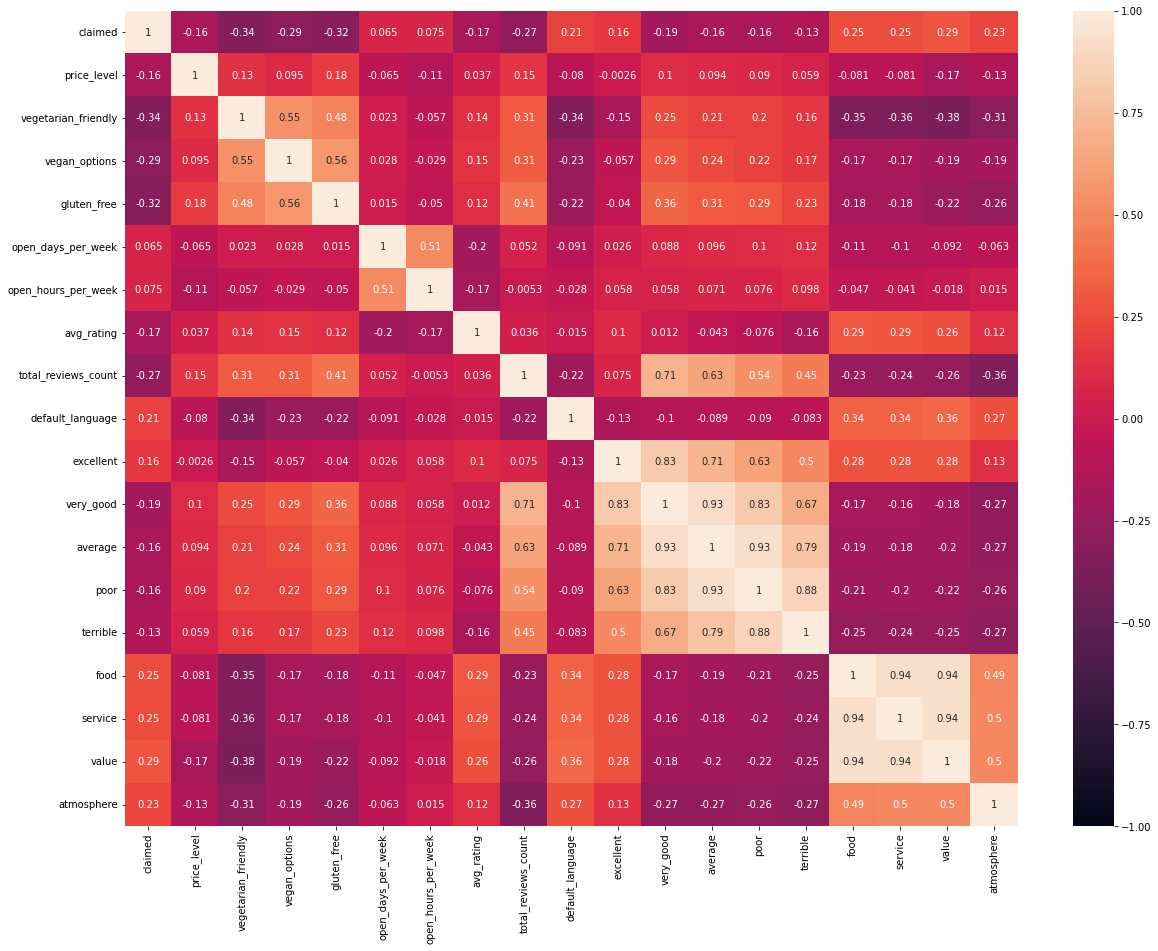

In [49]:
#Generation of HeatMap
plt.figure(figsize=(20,15))
sns.heatmap(data_set.corr(), vmin =-1, vmax=1, annot= True)

In [50]:
#Removing the features having less correlation
data_set.drop(['open_hours_per_week','open_days_per_week','terrible','average','poor'],axis=1,inplace=True)

As some columns require for prediction are having Nan values, below code is used to replace Nan values with 0


In [51]:
#data_set
data_set[['excellent','very_good','food','service','value','atmosphere','total_reviews_count','default_language','avg_rating']] = data_set[['excellent','very_good','food','service','value','atmosphere','total_reviews_count','default_language','avg_rating']].fillna(0)
#Removing Nan values
data_set.dropna(axis=0,inplace=True)

Separting the dataset into Training data and Testing data

In [52]:
#Separting features dataset
X_data = data_set.drop('avg_rating', axis=1)
print(X_data.shape)

(806192, 13)


In [53]:
#separting target feature dataset
Y_data = data_set['avg_rating']
print(Y_data.shape)

(806192,)


In [54]:
#Dividing dataset for training and testing
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, random_state=0, train_size = .75)

In [55]:
#keeping only required features
required_cols = ['claimed','price_level', 'vegetarian_friendly','vegan_options','default_language','gluten_free','total_reviews_count','excellent','very_good','food','service','value', 'atmosphere']
X_test = X_test[required_cols]

In [56]:
len(X_test)

201548

One hot Encoding for the target feature dataset.


In [57]:
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)  

###4. Building a Model

##4.1 Choice of model
In our scenario we will be using Logistic Regression for initial prediction of the target feature. This model helps to understand relationship between target feature(i.e avg_rating) and one or more nominal independent variables (i.e sample features).This model achieves very good performance with linearly separable classes.

Logistic Regression

In [58]:
logistic_reg = LogisticRegression(random_state=0)
logistic_reg.fit(X_train,y_train) 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=0)

In [59]:
rf_prediction_train = logistic_reg.predict(X_train)
rf_prediction_test = logistic_reg.predict(X_test)
print(len(rf_prediction_train), len(rf_prediction_test))

604644 201548


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [60]:
len(rf_prediction_train)

604644

In [61]:
#evaluating on train data
print("Train data testing")
report = classification_report(y_train, rf_prediction_train)
print(f'{report}')

Train data testing


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      0.96      0.98     21932
           1       0.00      0.00      0.00      1139
           2       0.00      0.00      0.00      1429
           3       0.00      0.00      0.00      5282
           4       0.00      0.00      0.00     12980
           5       0.31      0.00      0.00     36345
           6       0.40      0.04      0.08     91367
           7       0.44      0.52      0.48    185712
           8       0.47      0.77      0.58    189467
           9       0.62      0.41      0.49     58991

    accuracy                           0.48    604644
   macro avg       0.32      0.27      0.26    604644
weighted avg       0.46      0.48      0.43    604644



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [62]:
#evaluating on train data
print("Test data testing")
report = classification_report(y_test, rf_prediction_test)
print(f'{report}')

Test data testing
              precision    recall  f1-score   support

           0       0.24      0.97      0.39      7495
           1       0.00      0.00      0.00       355
           2       0.00      0.00      0.00       449
           3       0.00      0.00      0.00      1725
           4       0.00      0.00      0.00      4233
           5       0.15      0.09      0.11     12133
           6       0.30      0.19      0.23     30346
           7       0.43      0.17      0.25     62268
           8       0.37      0.22      0.27     62921
           9       0.17      0.72      0.27     19623

    accuracy                           0.26    201548
   macro avg       0.17      0.24      0.15    201548
weighted avg       0.33      0.26      0.24    201548



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


If we consider the accuracy score from the training and testing classification reports, it is 51% for train data and 41% for test data, which is less for giving the accurate prediction. Lets consider implementing hyper parameter tuning to increase the accuracy. The F1 score for this model is 0.32.

## 4.2 Hyper Parameter Tuning


To increase the accuracy, here we will use DecisionTreeClassifier model by passing a max-depth=4

In [63]:
decision_tree_hyper = DecisionTreeClassifier(random_state=0, max_depth=4)
decision_tree_hyper.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [64]:
dt_prediction_train_hyper = decision_tree_hyper.predict(X_train)
dt_prediction_test_hyper = decision_tree_hyper.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [65]:
#evaluating on train data
print("Train data testing")
report = classification_report(y_train, dt_prediction_train_hyper)
print(f'{report}')

Train data testing


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      0.98      0.99     21932
           1       0.00      0.00      0.00      1139
           2       0.00      0.00      0.00      1429
           3       0.00      0.00      0.00      5282
           4       0.36      0.27      0.31     12980
           5       0.47      0.29      0.36     36345
           6       0.56      0.50      0.53     91367
           7       0.65      0.60      0.62    185712
           8       0.59      0.71      0.65    189467
           9       0.47      0.57      0.52     58991

    accuracy                           0.60    604644
   macro avg       0.41      0.39      0.40    604644
weighted avg       0.59      0.60      0.59    604644



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [66]:
#evaluating on train data
print("Test data testing")
report = classification_report(y_test, dt_prediction_test_hyper)
print(f'{report}')

Test data testing
              precision    recall  f1-score   support

           0       0.07      0.98      0.13      7495
           1       0.00      0.00      0.00       355
           2       0.00      0.00      0.00       449
           3       0.00      0.00      0.00      1725
           4       0.36      0.27      0.31      4233
           5       0.47      0.29      0.36     12133
           6       0.56      0.49      0.52     30346
           7       0.68      0.51      0.58     62268
           8       0.82      0.21      0.33     62921
           9       0.52      0.01      0.02     19623

    accuracy                           0.36    201548
   macro avg       0.35      0.28      0.23    201548
weighted avg       0.64      0.36      0.40    201548



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Observation:
If we observe from the above 2 classification reports, we can see that the accuracy of train data are 60% and test data accuracy is 36%, which is satisfactory and good for training dataset and testing data. Also, the F1 score for DecisionTreeClassifier is 0.40. But finally, lets experiment building the model using Random Forest Classifier to see if we get better results than this.

## 4.3 Training and evaluating model using random Forest Classifier

Random Forest Classifier 

In [67]:
rf = RandomForestClassifier(n_jobs=-1)
rf_model = rf.fit(X_train, y_train)

In [31]:
rf_prediction_train = rf.predict(X_train)
rf_prediction_test = rf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [68]:
#evaluating on train data
print("Train data testing")
report = classification_report(y_train, rf_prediction_train)
print(f'{report}')

Train data testing


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      0.96      0.98     21932
           1       0.00      0.00      0.00      1139
           2       0.00      0.00      0.00      1429
           3       0.00      0.00      0.00      5282
           4       0.00      0.00      0.00     12980
           5       0.31      0.00      0.00     36345
           6       0.40      0.04      0.08     91367
           7       0.44      0.52      0.48    185712
           8       0.47      0.77      0.58    189467
           9       0.62      0.41      0.49     58991

    accuracy                           0.48    604644
   macro avg       0.32      0.27      0.26    604644
weighted avg       0.46      0.48      0.43    604644



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [69]:
#evaluating on train data
print("Test data testing")
report = classification_report(y_test, rf_prediction_test)
print(f'{report}')

Test data testing
              precision    recall  f1-score   support

           0       0.24      0.97      0.39      7495
           1       0.00      0.00      0.00       355
           2       0.00      0.00      0.00       449
           3       0.00      0.00      0.00      1725
           4       0.00      0.00      0.00      4233
           5       0.15      0.09      0.11     12133
           6       0.30      0.19      0.23     30346
           7       0.43      0.17      0.25     62268
           8       0.37      0.22      0.27     62921
           9       0.17      0.72      0.27     19623

    accuracy                           0.26    201548
   macro avg       0.17      0.24      0.15    201548
weighted avg       0.33      0.26      0.24    201548



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Observations

Finally, the accuracy scores of train and test data are 48% and 26% respectively . These scores of accuracy are better than the logistic regression but less than decision tree with hyper parameter tuning. From logistic regression and decision tree model, we can see that the decision tree model with hyper parameter tuning is better suitable than the logistic model as the accuracy, f1_score, recall and precision have been increased using decision tree with hyper parameter tuning. However, Random Forest Classifier results were less than the decision tree classifier with hyper parameter tuning. Hence, we can consider the model built by Rdecision tree classifier with hyper parameter tuning for predicting the target variable i.e., average rating of a restaurant

##4.4 Learning Curve

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed d

([0.9474397988885949,
  0.9369707594601746,
  0.9312928282789302,
  0.9271801105611994,
  0.9236873267575632,
  0.9210388493492031,
  0.918563496751329,
  0.9165169572992361,
  0.9143994898737364,
  0.9126510806358783],
 [0.26292496080338185,
  0.2441899696350249,
  0.19237104808780042,
  0.1809593744418203,
  0.14020481473395915,
  0.1525194990771429,
  0.1583344910393554,
  0.16884811558536925,
  0.10622779685236271,
  0.11343699763827972])

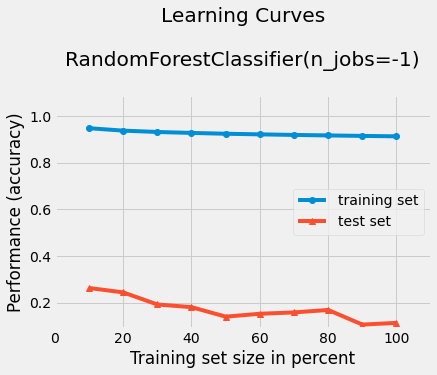

In [70]:
from mlxtend.plotting import plot_learning_curves
plot_learning_curves(X_train, y_train,X_test,y_test, rf_model, scoring='accuracy')

### 5 Model Performance Analysis

Evaluation metric selected is F1-score. As the F1-score for the Decision Tree Classifier is 0.40 for testing data and 0.59 for training data better than Random Forest and Logistic Regression


As we have seen in the above classification model the accuracy is more in Decision Tree classification model for Training data andtesting data. The model will be used for solving business problem if we are providing sufficient testing data to the model, the model can give more accurate result.

**Reference:**


https://www.analyticsvidhya.com/blog/2021/07/metrics-to-evaluate-your-classification-model-to-take-the-right-decisions/   
https://analyticsindiamag.com/7-types-classification-algorithms/ 
https://builtin.com/data-science/scikit-learn
https://towardsdatascience.com/the-f1-score-bec2bbc38aa6
https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.02-Introducing-Scikit-Learn.ipynb#scrollTo=jYehMb-hVp_B
https://www.analyticsvidhya.com/blog/2020/10/feature-selection-techniques-in-machine-learning/
https://datascience.stackexchange.com/questions/11928/valueerror-input-contains-nan-infinity-or-a-value-too-large-for-dtypefloat32
https://www.analyticsvidhya.com/blog/2021/05/dealing-with-missing-values-in-python-a-complete-guide/